In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Load the penguins dataset from seaborn's built-in datasets
penguins = sns.load_dataset('penguins').dropna()

In [ ]:
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male


The penguins dataset contains data on measurements from 3 different species of penguin. If we could somehow visualise in more than 3 dimensions, we should see more or pockets of data points that correspond . However, using PCA, we can capture these some of patterns in a lower number of dimensions!

In [ ]:
# Select the features for PCA
print('Number of rows ', len(penguins))
X = penguins.drop(columns=['species', 'island', 'sex'])
print('Shape of input to PCA', X.shape)

# Standardize the features to help PCA  see https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

Number of rows  333
Shape of input to PCA (333, 4)


In [ ]:
len(penguins[['species']])

333

(333, 2)
333


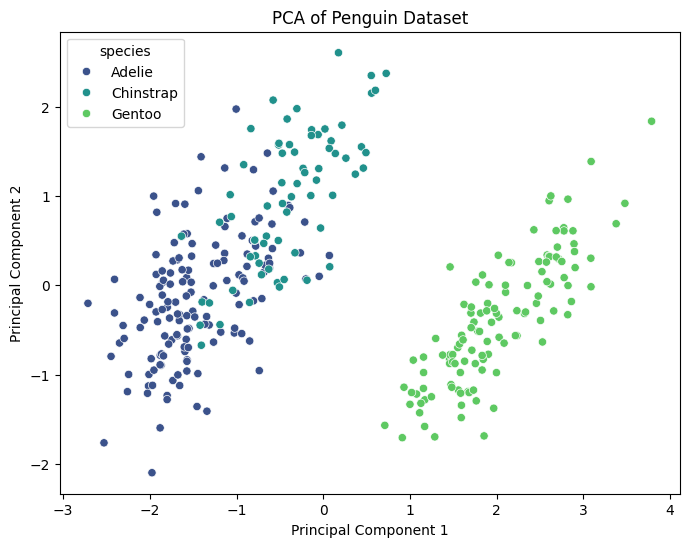

Percentage of variance explained by PCA: 88.08682242049917


In [ ]:
# Perform PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
print(X_pca.shape)

# Create a DataFrame with the PCA results
pca_df = pd.DataFrame(data=X_pca, columns=['Principal Component 1', 'Principal Component 2'])
species = penguins[['species']].reset_index() # to prevent duplication see https://stackoverflow.com/questions/50368145/pandas-concat-increases-number-of-rows
pca_df = pd.concat([pca_df, species], axis=1)
print(len(pca_df))

# Plot the PCA results
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Principal Component 1', y='Principal Component 2', hue='species', data=pca_df, palette='viridis')
plt.title('PCA of Penguin Dataset')
plt.show()

# Explained variance
print(f"Percentage of variance explained by PCA: {sum(pca.explained_variance_ratio_) * 100}")

As seen above, with 2 dimensions, we can capture a lot of distinguishing signal in the data among the 3 species. The 2 dimensional projection captures 88% of the variance in the feature space. What if we plot in 3D?

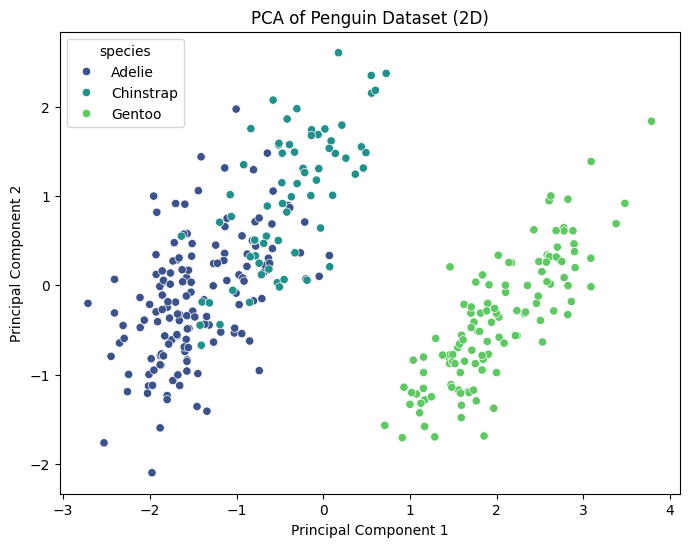

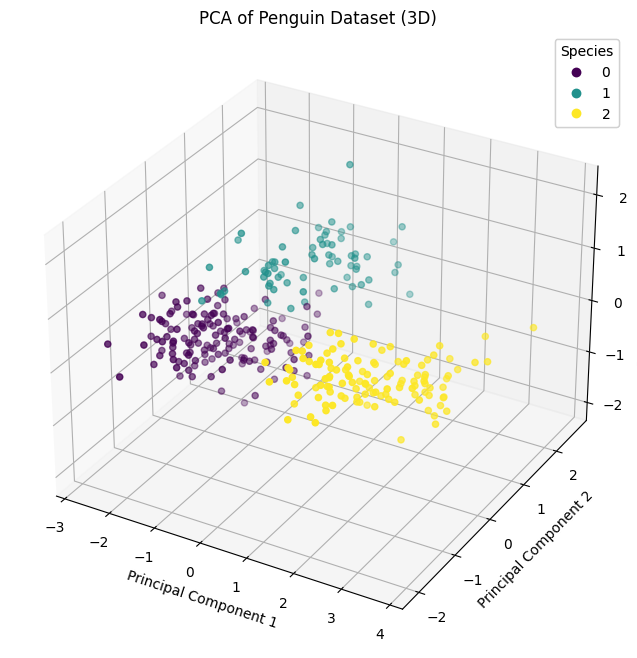

Percentage of variance explained by PCA: 97.30288540858751


In [ ]:
# Step 4: Perform PCA
# Perform PCA
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X_scaled)

# Create a DataFrame with the PCA results
pca_df = pd.DataFrame(data=X_pca, columns=['Principal Component 1', 'Principal Component 2', 'Principal Component 3'])
species = penguins[['species']].reset_index()
pca_df = pd.concat([pca_df, species], axis=1)
pca_df = pca_df.dropna()

# Plot the PCA results in 2D
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Principal Component 1', y='Principal Component 2', hue='species', data=pca_df, palette='viridis')
plt.title('PCA of Penguin Dataset (2D)')
plt.show()

# Plot the PCA results in 3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(pca_df['Principal Component 1'], pca_df['Principal Component 2'], pca_df['Principal Component 3'], c=pca_df['species'].astype('category').cat.codes, cmap='viridis')
legend1 = ax.legend(*scatter.legend_elements(), title="Species")
ax.add_artist(legend1)
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
plt.title('PCA of Penguin Dataset (3D)')
plt.show()

# Explained variance
print(f"Percentage of variance explained by PCA: {sum(pca.explained_variance_ratio_) * 100}")










We see that the 3D plot captures more distinguishing signal and represents 97% of the variance in the data

## Clustering

We can also use the same dataset for clustering. Note that while we would not know the clusters before hand in many real applications, we expect the clusters to more or less correspond to the species in this dataset

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

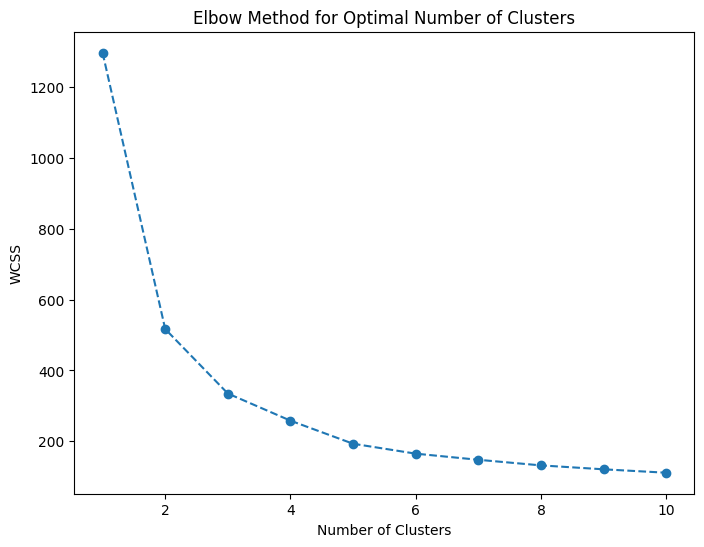

In [ ]:
# Determine the optimal number of clusters using the elbow method
# see https://www.geeksforgeeks.org/elbow-method-for-optimal-value-of-k-in-kmeans/
wcss = []  # Within-cluster sum of squares

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X_pca)
    wcss.append(kmeans.inertia_)

# Plot the elbow graph
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

The elbow in the graph appears at $k=3$, we let us re-run with 3 clusters

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


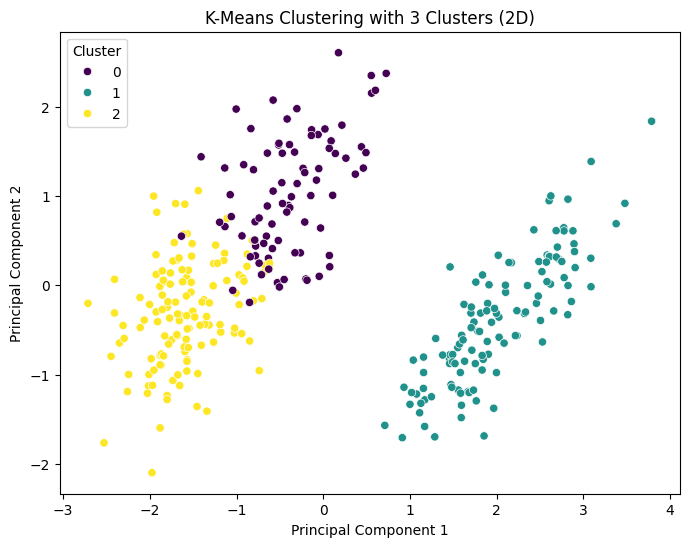

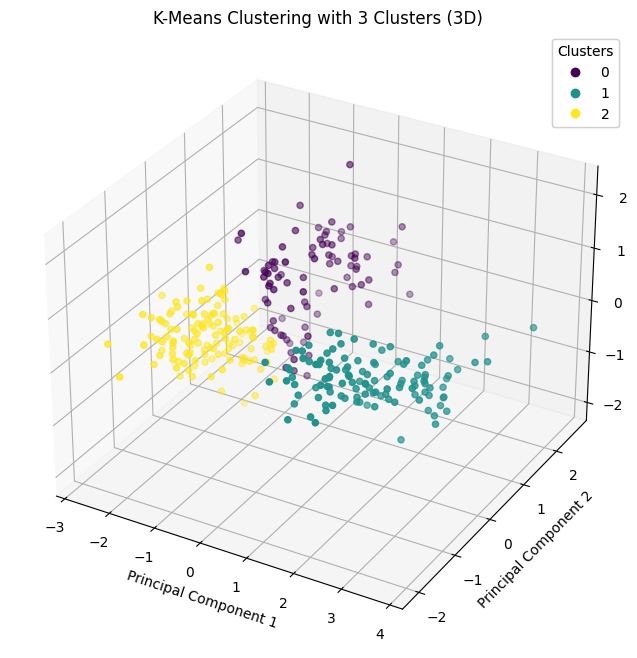

In [ ]:
# Choose the optimal number of clusters (from the elbow plot)
optimal_clusters = 3

# Perform K-Means clustering
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
kmeans.fit(X_pca)
labels = kmeans.labels_

# Add the cluster labels to the PCA DataFrame
pca_df['Cluster'] = labels

# Plot the K-Means clustering results in 2D
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Principal Component 1', y='Principal Component 2', hue='Cluster', data=pca_df, palette='viridis')
plt.title(f'K-Means Clustering with {optimal_clusters} Clusters (2D)')
plt.show()

# Plot the K-Means clustering results in 3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(pca_df['Principal Component 1'], pca_df['Principal Component 2'], pca_df['Principal Component 3'], c=pca_df['Cluster'], cmap='viridis')
legend1 = ax.legend(*scatter.legend_elements(), title="Clusters")
ax.add_artist(legend1)
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
plt.title(f'K-Means Clustering with {optimal_clusters} Clusters (3D)')
plt.show()

We see that the clusters discovered by K-means correspond well to the species per their projection into both 2 and 3 dimensions. This indicates that K-means was capable of capturing the cluster structures well